In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Client_segment_Limpio2.csv", sep=';')

In [4]:
# Selección de variables numéricas y categóricas
num_features = ["Edad", "Ingresos anuales brutos", "Gasto_medio_mensual_cuota"]
cat_features = ["Genero", "Casado", "Graduado", "Profesion", "Experiencia laboral", "Gastoscore"]


In [5]:
# Crear pipelines de transformación
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop="first")

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

In [7]:
# Transformar los datos
X_preprocessed = preprocessor.fit_transform(df)

In [8]:
# Aplicar la regla del codo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

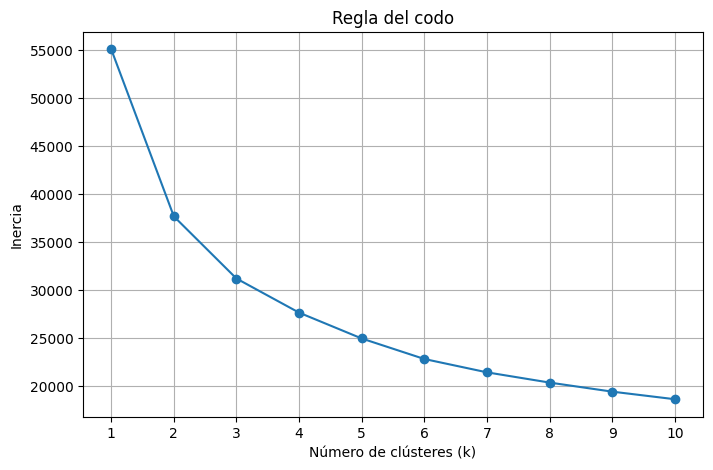

In [9]:
# Graficar la regla del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.title("Regla del codo")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.xticks(k_values)
plt.grid()
plt.show()


In [13]:
# Análisis de silueta
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    score = silhouette_score(X_preprocessed, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

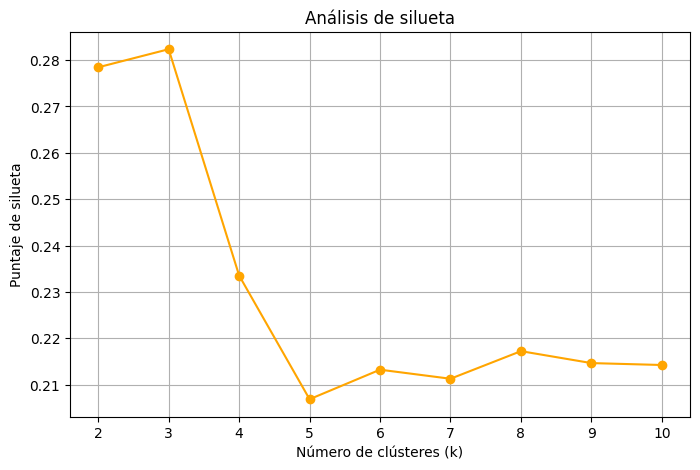

In [14]:
# Graficar análisis de silueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker="o", color="orange")
plt.title("Análisis de silueta")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Puntaje de silueta")
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [17]:

# Determinar el número óptimo de clústeres
optimal_k = np.argmax(silhouette_scores) + 2
optimal_k

3

In [18]:

# Entrenar KMeans con el número óptimo de clústeres
kmeans_optimal = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans_optimal.fit_predict(X_preprocessed)

# Mostrar los datos con los clústeres asignados
print(df[["ID", "Edad", "Ingresos anuales brutos", "Gasto_medio_mensual_cuota", "Cluster"]])

             ID  Edad  Ingresos anuales brutos  Gasto_medio_mensual_cuota  \
0          CLI2    24                    13945                         30   
1          CLI3    42                   118107                         30   
2          CLI4    74                    53533                         50   
3          CLI5    74                    82273                         50   
4          CLI6    44                    90776                         30   
...         ...   ...                      ...                        ...   
10801  CLI10803    35                    22751                         30   
10802  CLI10804    34                    29184                         30   
10803  CLI10805    46                    69622                         50   
10804  CLI10806    46                    49328                         30   
10805  CLI10807    43                   129130                         50   

       Cluster  
0            0  
1            1  
2            2  
3      

C:\Users\Germán Llorente\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Guardar el dataset con los clústeres en un archivo CSV
path = "clientes_clusters.csv"
df.to_csv(path, sep=';', index=False)
